# Standard Import tool Example

In [1]:
import os, json
%matplotlib inline

Import the required packages from libcbm
 
    - sit_cbm_factory: a module for initializing the CBM model from the CBM Standard import tool format
    - cbm_simulator: simulates the sit dataset using the CBM model


In [2]:
import notebook_startup
from libcbm.input.sit import sit_cbm_factory
from libcbm.model.cbm import cbm_simulator

## Setup
Load the standard import tool configuration at the specified path.  This configuration encompasses the data source for the various sit inputs (sit_inventory, sit_classifiers etc.) and also the relationships of classifiers, and disturbance types to the default CBM parameters.

In [3]:
config_path = os.path.abspath("./sit/growth_only/sit_config.json")
sit = sit_cbm_factory.load_sit(config_path)

Initialize and validate the inventory in the sit dataset

In [4]:
classifiers, inventory = sit_cbm_factory.initialize_inventory(sit)

Initialize an instance of the CBM model

In [5]:
cbm = sit_cbm_factory.initialize_cbm(sit)

Create storage and a function for storing CBM simulation results.  This particular implementation appends timestep results for each step into a running DataFrame which is stored in memory.

In [6]:
results, reporting_func = cbm_simulator.create_in_memory_reporting_func()

## Simulation
The following line of code spins up the CBM inventory and runs it through 100 timesteps. 

In [7]:
cbm_simulator.simulate(
    cbm, 
    n_steps=100,
    classifiers=classifiers,
    inventory=inventory, 
    pool_codes=sit.defaults.get_pools(), 
    flux_indicator_codes=sit.defaults.get_flux_indicators(), 
    pre_dynamics_func = lambda x: x,
    reporting_func=reporting_func)


## Pool Results

In [8]:
pi = results.pool_indicators

In [9]:
pi.head()

identifier  timestep  Input  SoftwoodMerch  SoftwoodFoliage  SoftwoodOther  \
0           1         0    1.0       2.214858         1.947779       6.477017   
1           2         0    1.0      35.620019         2.494587      10.526642   
2           3         0    1.0       0.470588         3.098615       3.352962   
0           1         1    1.0       2.581305         2.074610       7.136709   
1           2         1    1.0      35.620019         2.494587      10.526642   

   SoftwoodCoarseRoots  SoftwoodFineRoots  HardwoodMerch  HardwoodFoliage  \
0             1.562792           0.799212       0.000000         0.000000   
1             9.860282           0.938075      38.721871         4.626631   
2             0.973983           0.562738       0.000000         0.000000   
0             1.753310           0.864652       0.000000         0.000000   
1             9.860282           0.938075      38.721871         4.626631   

   ...  BelowGroundSlowSoil  SoftwoodStemSnag  SoftwoodBranchSnag  \
0  ...            71.029425         22.183571            4.636539   
1  ...           157.978060          3.449189            0.731767   
2  ...            70.992454         22.158805            4.541747   
0  ...            70.943349         21.258643            4.069901   
1  ...           158.052576          3.462322            0.733047   

   HardwoodStemSnag  HardwoodBranchSnag           CO2        CH4          CO  \
0          0.000000            0.000000   5565.890493   5.284379   47.557945   
1          3.738908            1.385104  15441.816791  14.538085  130.838452   
2          0.000000            0.000000   5565.629202   5.284379   47.557945   
0          0.000000            0.000000   5568.278796   5.284379   47.557945   
1          3.753634            1.391146  15449.477828  14.538085  130.838452   

   NO2  Products  
0  0.0       0.0  
1  0.0       0.0  
2  0.0       0.0  
0  0.0       0.0  
1  0.0       0.0  

[5 rows x 29 columns]

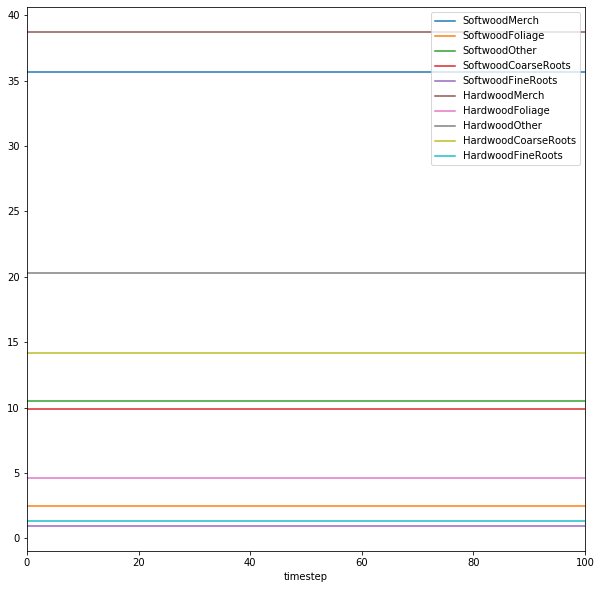

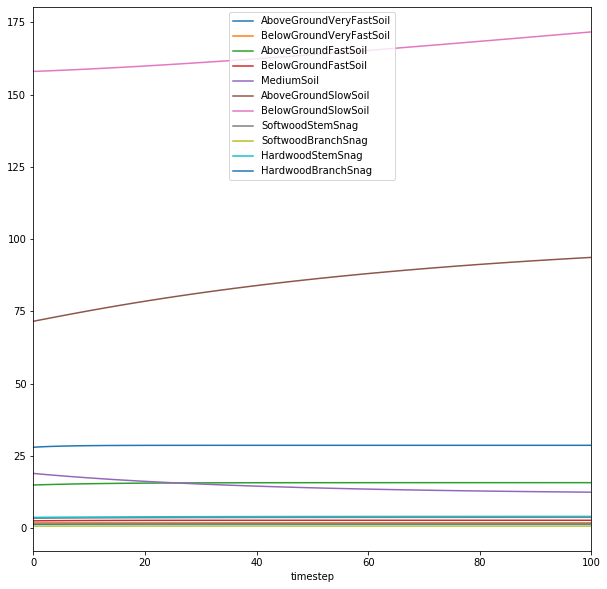

In [10]:
biomass_pools = ['SoftwoodMerch','SoftwoodFoliage', 'SoftwoodOther', 'SoftwoodCoarseRoots', 'SoftwoodFineRoots',
                 'HardwoodMerch', 'HardwoodFoliage', 'HardwoodOther', 'HardwoodCoarseRoots', 'HardwoodFineRoots']

dom_pools = ['AboveGroundVeryFastSoil', 'BelowGroundVeryFastSoil', 'AboveGroundFastSoil', 'BelowGroundFastSoil',
             'MediumSoil', 'AboveGroundSlowSoil', 'BelowGroundSlowSoil', 'SoftwoodStemSnag', 'SoftwoodBranchSnag',
             'HardwoodStemSnag', 'HardwoodBranchSnag']

pi[pi.identifier==2][['timestep']+biomass_pools].groupby("timestep").sum().plot(figsize=(10,10))
pi[pi.identifier==2][['timestep']+dom_pools].groupby("timestep").sum().plot(figsize=(10,10))

## State Variable Results

In [11]:
si = results.state_indicators

In [12]:
si.head()

identifier  timestep  last_disturbance_type  time_since_last_disturbance  \
0           1         0                      1                           10   
1           2         0                      1                          100   
2           3         0                      1                           10   
0           1         1                      1                           11   
1           2         1                      1                          101   

   time_since_land_class_change  growth_enabled  enabled  land_class  age  \
0                            -1               1        1           0   10   
1                            -1               1        1           0  100   
2                            -1               0        1           1    0   
0                            -1               1        1           0   11   
1                            -1               1        1           0  101   

   growth_multiplier  regeneration_delay  
0                1.0                   0  
1                1.0                   0  
2                1.0                   0  
0                1.0                   0  
1                1.0                   0

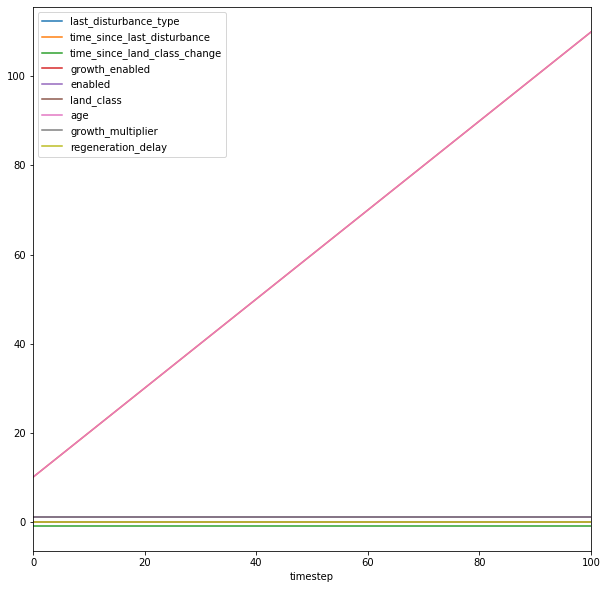

In [13]:
state_variables = ['timestep','last_disturbance_type', 'time_since_last_disturbance', 'time_since_land_class_change',
 'growth_enabled', 'enabled', 'land_class', 'age', 'growth_multiplier', 'regeneration_delay']
si[si.identifier==1][state_variables].groupby('timestep').sum().plot(figsize=(10,10))

## Flux Indicators

In [14]:
fi = results.flux_indicators

In [15]:
fi.head()

identifier  timestep  DisturbanceCO2Production  DisturbanceCH4Production  \
0           1         1                       0.0                       0.0   
1           2         1                       0.0                       0.0   
2           3         1                       0.0                       0.0   
0           1         2                       0.0                       0.0   
1           2         2                       0.0                       0.0   

   DisturbanceCOProduction  DisturbanceBioCO2Emission  \
0                      0.0                        0.0   
1                      0.0                        0.0   
2                      0.0                        0.0   
0                      0.0                        0.0   
1                      0.0                        0.0   

   DisturbanceBioCH4Emission  DisturbanceBioCOEmission  DecayDOMCO2Emission  \
0                        0.0                       0.0             2.388304   
1                        0.0                       0.0             7.661037   
2                        0.0                       0.0             2.310076   
0                        0.0                       0.0             2.370825   
1                        0.0                       0.0             7.680948   

   DisturbanceSoftProduction  ...  DisturbanceVFastBGToAir  \
0                        0.0  ...                      0.0   
1                        0.0  ...                      0.0   
2                        0.0  ...                      0.0   
0                        0.0  ...                      0.0   
1                        0.0  ...                      0.0   

   DisturbanceFastAGToAir  DisturbanceFastBGToAir  DisturbanceMediumToAir  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   

   DisturbanceSlowAGToAir  DisturbanceSlowBGToAir  DisturbanceSWStemSnagToAir  \
0                     0.0                     0.0                         0.0   
1                     0.0                     0.0                         0.0   
2                     0.0                     0.0                         0.0   
0                     0.0                     0.0                         0.0   
1                     0.0                     0.0                         0.0   

   DisturbanceSWBranchSnagToAir  DisturbanceHWStemSnagToAir  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
0                           0.0                         0.0   
1                           0.0                         0.0   

   DisturbanceHWBranchSnagToAir  
0                           0.0  
1                           0.0  
2                           0.0  
0                           0.0  
1                           0.0  

[5 rows x 54 columns]

In [16]:
annual_process_fluxes = [
    'DecayDOMCO2Emission',
    'DeltaBiomass_AG',
    'DeltaBiomass_BG',
    'TurnoverMerchLitterInput',
    'TurnoverFolLitterInput',
    'TurnoverOthLitterInput',
    'TurnoverCoarseLitterInput',
    'TurnoverFineLitterInput',
    'DecayVFastAGToAir',
    'DecayVFastBGToAir',
    'DecayFastAGToAir',
    'DecayFastBGToAir',
    'DecayMediumToAir',
    'DecaySlowAGToAir',
    'DecaySlowBGToAir',
    'DecaySWStemSnagToAir',
    'DecaySWBranchSnagToAir',
    'DecayHWStemSnagToAir',
    'DecayHWBranchSnagToAir']


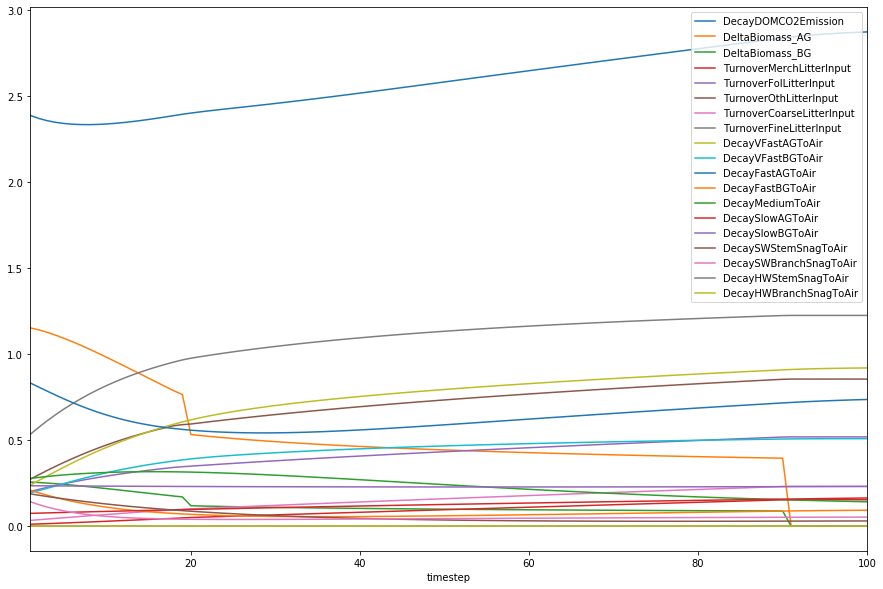

In [17]:
fi[fi["identifier"]==1][["timestep"]+annual_process_fluxes].groupby("timestep").sum().plot(figsize=(15,10))

## Appendix

### SIT source data

In [18]:
sit.sit_data.age_classes

name  class_size  start_year  end_year
0    age_0           0           0         0
1    age_1          10           1        10
2    age_2          10          11        20
3    age_3          10          21        30
4    age_4          10          31        40
5    age_5          10          41        50
6    age_6          10          51        60
7    age_7          10          61        70
8    age_8          10          71        80
9    age_9          10          81        90
10  age_10          10          91       100

In [19]:
sit.sit_data.inventory

species non forest type  age  area  delay  land_class  \
0      sp               f   10   1.0      0           0   
1      pn               f  100   1.0      0           0   
2      sp              nf    0   1.0     10           1   

  historical_disturbance_type last_pass_disturbance_type  spatial_reference  
0                        fire                       fire                  0  
1                        fire                       fire                  1  
2                        fire                       fire                  2

In [20]:
sit.sit_data.classifiers

id             name
0   1          species
4   2  non forest type

In [21]:
sit.sit_data.classifier_values

classifier_id name  description
1              1   sp       spruce
2              1   pn         pine
3              1  oak          oak
5              2   nf    gleysolic
6              2    f  forest only

In [22]:
sit.sit_data.disturbance_types

id           name
0  dist1           fire
1  dist2       clearcut
2  dist3  deforestation

In [23]:
sit.sit_data.yield_table

species non forest type  leading_species   v0    v1    v2    v3    v4    v5  \
0      sp               ?                1  0.0  15.0  30.0  45.0  60.0  75.0   
1      pn               ?               11  0.0  15.0  30.0  45.0  60.0  75.0   
2      pn               ?              109  0.0  15.0  30.0  45.0  60.0  75.0   

     v6     v7     v8     v9    v10  
0  90.0  105.0  120.0  135.0  150.0  
1  90.0  105.0  120.0  135.0  150.0  
2  90.0  105.0  120.0  135.0  150.0

In [24]:
print(json.dumps(sit.config, indent=4, sort_keys=True))

{
    "import_config": {
        "age_classes": {
            "params": {
                "path": "sit_age_classes.csv"
            },
            "type": "csv"
        },
        "classifiers": {
            "params": {
                "path": "sit_classifiers.csv"
            },
            "type": "csv"
        },
        "disturbance_types": {
            "params": {
                "path": "sit_disturbance_types.csv"
            },
            "type": "csv"
        },
        "events": null,
        "inventory": {
            "params": {
                "path": "sit_inventory.csv"
            },
            "type": "csv"
        },
        "transitions": null,
        "yield": {
            "params": {
                "path": "sit_yield.csv"
            },
            "type": "csv"
        }
    },
    "mapping_config": {
        "disturbance_types": [
            {
                "default_dist_type": "Wildfire",
                "user_dist_type": "fire"
            },
           